In [37]:
import Actions
import Agent
import Maze
import Policy
from Evaluation import Evaluation

import copy
import matplotlib.pyplot as plt


In [38]:
maze = Maze.Maze()
maze.set_reward((0, 3), 40)
maze.set_reward((1, 2), -10)
maze.set_reward((1, 3), -10)
maze.set_reward((3, 0), 10)
maze.set_reward((3, 1), -2)

maze.assign_maze_states()
maze.set_terminal((0, 3), True)
maze.set_terminal((3, 0), True)

In [39]:
## Setup agent
policy = Policy.Policy(lenght=4, width=4)
agent = Agent.Agent(maze, policy, maze.maze_states[3][2],1)

In [40]:
evaluation_gamma_1 = Evaluation(learning_rate= 0.1, discount_factor= 1, epsilon= 0.1)
evaluation_gamma_0_9 = Evaluation(learning_rate= 0.1, discount_factor= 0.9, epsilon= 0.1)
evaluation_gamma_0_5 = Evaluation(learning_rate= 0.1, discount_factor= 0.5, epsilon= 0.1)

In [41]:
agent.value_function()

In [42]:
print("TD learning:")

agent_policy1 = copy.deepcopy(agent.policy)
agent_policy2 = copy.deepcopy(agent.policy)

print("Gamma = 1")
maze_values_1 = copy.deepcopy(evaluation_gamma_1.temporal_difference_learning(agent_policy1, maze))

print("Gamma = 0.5")
maze_values_2 = copy.deepcopy(evaluation_gamma_0_5.temporal_difference_learning(agent_policy2, maze))

TD learning:
Gamma = 1
-3.00 -2.00 -1.00 0.00 
-4.00 -3.00 -11.00 -10.00 
-5.00 -4.00 -5.00 -6.00 
0.00 -6.00 -6.00 -7.00 

Gamma = 0.5
-1.75 -1.50 -1.00 0.00 
-1.87 -1.75 -10.50 -10.00 
-1.94 -1.87 -1.94 -1.97 
0.00 -2.94 -1.97 -1.98 



In [43]:
print("SARSA:")
print("Gamma = 1")
SARSA_Q_map_1 = evaluation_gamma_1.SARSA(maze)
print("Gamma = 0.9")
SARSA_Q_map_0_9 = evaluation_gamma_0_9.SARSA(maze)


SARSA:
Gamma = 1
(0, 0) LEFT -4.32 RIGHT -3.78 UP -4.06 DOWN -3.50 
(0, 1) LEFT -4.15 RIGHT -2.04 UP -4.15 DOWN -4.18 
(0, 2) LEFT -3.63 RIGHT -1.00 UP -2.02 DOWN -13.10 
(0, 3) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 

(1, 0) LEFT -3.39 RIGHT -4.24 UP -4.38 DOWN -2.02 
(1, 1) LEFT -3.57 RIGHT -11.39 UP -3.68 DOWN -3.28 
(1, 2) LEFT -12.97 RIGHT -19.37 UP -11.31 DOWN -12.96 
(1, 3) LEFT -20.04 RIGHT -18.80 UP -10.00 DOWN -14.33 

(2, 0) LEFT -2.03 RIGHT -3.58 UP -3.39 DOWN -1.00 
(2, 1) LEFT -2.14 RIGHT -5.45 UP -4.27 DOWN -3.12 
(2, 2) LEFT -3.28 RIGHT -6.36 UP -12.42 DOWN -4.26 
(2, 3) LEFT -5.77 RIGHT -5.92 UP -11.39 DOWN -5.40 

(3, 0) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 
(3, 1) LEFT -2.00 RIGHT -5.52 UP -4.15 DOWN -4.21 
(3, 2) LEFT -3.31 RIGHT -5.39 UP -4.47 DOWN -4.23 
(3, 3) LEFT -4.38 RIGHT -5.21 UP -6.43 DOWN -5.24 

Gamma = 0.9
(0, 0) LEFT -3.41 RIGHT -3.23 UP -3.55 DOWN -2.87 
(0, 1) LEFT -3.68 RIGHT -2.21 UP -3.17 DOWN -3.49 
(0, 2) LEFT -3.04 RIGHT -1.00 UP -2.32 DOWN -

In [44]:
print("Gamma = 1")
Q_learning_Q_map_1 = evaluation_gamma_1.Q_learning(maze)
print("Gamma = 0.9")
Q_learning_Q_map_0_9 = evaluation_gamma_0_9.Q_learning(maze)

Gamma = 1
(0, 0) LEFT -3.93 RIGHT -3.00 UP -3.79 DOWN -3.00 
(0, 1) LEFT -3.85 RIGHT -2.00 UP -2.98 DOWN -3.87 
(0, 2) LEFT -3.00 RIGHT -1.00 UP -2.00 DOWN -11.95 
(0, 3) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 

(1, 0) LEFT -2.89 RIGHT -3.81 UP -3.97 DOWN -2.00 
(1, 1) LEFT -3.00 RIGHT -10.88 UP -3.00 DOWN -3.00 
(1, 2) LEFT -12.70 RIGHT -18.77 UP -11.00 DOWN -12.75 
(1, 3) LEFT -19.81 RIGHT -19.10 UP -10.00 DOWN -13.46 

(2, 0) LEFT -2.00 RIGHT -3.00 UP -3.00 DOWN -1.00 
(2, 1) LEFT -2.00 RIGHT -4.00 UP -3.99 DOWN -3.00 
(2, 2) LEFT -3.00 RIGHT -4.93 UP -11.29 DOWN -3.96 
(2, 3) LEFT -4.00 RIGHT -4.80 UP -9.75 DOWN -4.92 

(3, 0) LEFT 0.00 RIGHT 0.00 UP 0.00 DOWN 0.00 
(3, 1) LEFT -2.00 RIGHT -4.99 UP -3.98 DOWN -3.97 
(3, 2) LEFT -3.00 RIGHT -4.95 UP -3.98 DOWN -3.97 
(3, 3) LEFT -4.00 RIGHT -4.66 UP -4.86 DOWN -4.83 

Gamma = 0.9
(0, 0) LEFT -3.22 RIGHT -2.71 UP -3.38 DOWN -2.71 
(0, 1) LEFT -3.41 RIGHT -1.90 UP -2.69 DOWN -3.34 
(0, 2) LEFT -2.71 RIGHT -1.00 UP -1.90 DOWN -10.80 
(

# Visualisation

# TD Learning

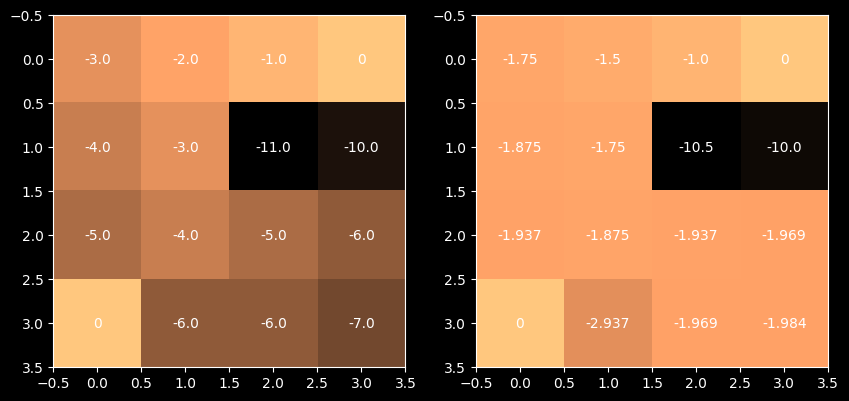

In [45]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))

data_array_1 = []
data_array_2 = []
for i in range(4):
    col1 = []
    col2 = []

    for j in range(4):
        col1.append(round(maze_values_1[i][j].value,3))
        col2.append(round(maze_values_2[i][j].value,3))
        ax1.text(j, i, round(maze_values_1[i][j].value,3), ha="center", va="center", color="w")
        ax2.text(j, i, round(maze_values_2[i][j].value,3), ha="center", va="center", color="w")

    data_array_1.append(col1)
    data_array_2.append(col2)
ax1.imshow(data_array_1, cmap='copper', interpolation='nearest')
ax2.imshow(data_array_2, cmap='copper', interpolation='nearest')

## SARSA

In [46]:
def print_sidebyside_Q_map(Q_map1,Q_map2):

    for index, row in enumerate(Q_map1):
        for index2, col in enumerate(row):
            print(col[0][0].position, end=" ")
            print("Gamma = 1", end=" ")
            for index3, action in enumerate(col):
                print(action[1].name, end=" ")
                print("%.2f" % action[2], end=" ")
                print(" | ", end=" ")
            print("            Gamma = 0.9", end=" ")
            print(" | ", end=" ")
            for index3, action in enumerate(Q_map2[index][index2]):
                print(action[1].name, end=" ")
                print("%.2f" % action[2], end=" ")
                print(" | ", end=" ")
            print()
        print()


In [47]:
print("SARSA:")
print_sidebyside_Q_map(SARSA_Q_map_1,SARSA_Q_map_0_9)

SARSA:
(0, 0) Gamma = 1 LEFT -4.32  |  RIGHT -3.78  |  UP -4.06  |  DOWN -3.50  |              Gamma = 0.9  |  LEFT -3.41  |  RIGHT -3.23  |  UP -3.55  |  DOWN -2.87  |  
(0, 1) Gamma = 1 LEFT -4.15  |  RIGHT -2.04  |  UP -4.15  |  DOWN -4.18  |              Gamma = 0.9  |  LEFT -3.68  |  RIGHT -2.21  |  UP -3.17  |  DOWN -3.49  |  
(0, 2) Gamma = 1 LEFT -3.63  |  RIGHT -1.00  |  UP -2.02  |  DOWN -13.10  |              Gamma = 0.9  |  LEFT -3.04  |  RIGHT -1.00  |  UP -2.32  |  DOWN -12.20  |  
(0, 3) Gamma = 1 LEFT 0.00  |  RIGHT 0.00  |  UP 0.00  |  DOWN 0.00  |              Gamma = 0.9  |  LEFT 0.00  |  RIGHT 0.00  |  UP 0.00  |  DOWN 0.00  |  

(1, 0) Gamma = 1 LEFT -3.39  |  RIGHT -4.24  |  UP -4.38  |  DOWN -2.02  |              Gamma = 0.9  |  LEFT -2.77  |  RIGHT -4.38  |  UP -3.66  |  DOWN -1.98  |  
(1, 1) Gamma = 1 LEFT -3.57  |  RIGHT -11.39  |  UP -3.68  |  DOWN -3.28  |              Gamma = 0.9  |  LEFT -2.97  |  RIGHT -10.74  |  UP -3.06  |  DOWN -3.10  |  
(1, 2) Gamma

## Q Learning

In [48]:
print("Q-learning:")
print_sidebyside_Q_map(Q_learning_Q_map_1,Q_learning_Q_map_0_9)

Q-learning:
(0, 0) Gamma = 1 LEFT -3.93  |  RIGHT -3.00  |  UP -3.79  |  DOWN -3.00  |              Gamma = 0.9  |  LEFT -3.22  |  RIGHT -2.71  |  UP -3.38  |  DOWN -2.71  |  
(0, 1) Gamma = 1 LEFT -3.85  |  RIGHT -2.00  |  UP -2.98  |  DOWN -3.87  |              Gamma = 0.9  |  LEFT -3.41  |  RIGHT -1.90  |  UP -2.69  |  DOWN -3.34  |  
(0, 2) Gamma = 1 LEFT -3.00  |  RIGHT -1.00  |  UP -2.00  |  DOWN -11.95  |              Gamma = 0.9  |  LEFT -2.71  |  RIGHT -1.00  |  UP -1.90  |  DOWN -10.80  |  
(0, 3) Gamma = 1 LEFT 0.00  |  RIGHT 0.00  |  UP 0.00  |  DOWN 0.00  |              Gamma = 0.9  |  LEFT 0.00  |  RIGHT 0.00  |  UP 0.00  |  DOWN 0.00  |  

(1, 0) Gamma = 1 LEFT -2.89  |  RIGHT -3.81  |  UP -3.97  |  DOWN -2.00  |              Gamma = 0.9  |  LEFT -2.65  |  RIGHT -3.38  |  UP -3.42  |  DOWN -1.90  |  
(1, 1) Gamma = 1 LEFT -3.00  |  RIGHT -10.88  |  UP -3.00  |  DOWN -3.00  |              Gamma = 0.9  |  LEFT -2.71  |  RIGHT -9.14  |  UP -2.71  |  DOWN -2.71  |  
(1, 2) G